# Лабораторная работа №1
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

In [ ]:
import sys
sys.path.insert(0, '/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/')
print(sys.path)

In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA


colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Инициализация данных
```
    Обозначения см. в описании Л.Р. №1
    
```

In [3]:
# Словарь параметров
p_d = {}

In [4]:
# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 1., 2., 1., 2.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2.)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2.)
    
# Температура внешней среды
def p(t):
    #return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    return 0.
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2.)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -100., 100., 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    #return s * math.sin(s + math.pi / 2.)
    return math.sin(p_d['T']) + math.sin(s + math.pi / 2.)

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
N = 10
p_d['N'], p_d['M'] = N, 10 + N * N

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(2.0, 2.0, 0.2, 0.01818181818181818)

---
# Создание модели и управление

In [5]:
model = utils.Lab1OptCtrlModel(p_d)

In [6]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_5

In [7]:
model.solve(criterion, get_alpha, eps=10**-5)

90909.09090909091
0.0321347708309
0.0166765504777
0.0109630442322
0.00807842344925
0.00636798621299
0.0052476905499
0.00446225577406
0.00388357662042
0.00344078541793
0.00309171559277
0.00280981441957
0.0025775836302
0.00238305330044
0.00221777554392
0.0020756279285
0.00195207091516
0.00184367112557
0.00174778613701
0.00166235064207
0.00158572804259
0.00151660535261
0.00145391741262
0.00139679134181
0.0013445052183
0.00129645692695
0.00125214038251
0.00121112717615
0.00117305226042
0.00113760267624
0.00110450859622
0.0010735361493
0.00104448162771
0.00101716677646
0.000991434936902
0.000967147869602
0.000944183121169
0.000922431829713
0.000901796886117
0.000882191385749
0.000863537318535
0.000845764455734
0.000828809399836
0.0008126147704
0.000797128503682
0.000782303247947
0.000768095839564
0.000754466847567
0.000741380176469
0.000728802718835
0.000716704050465
0.000705056162237
0.000693833223545
0.000683011373086
0.000672568533366
0.000662484245847
0.000652739524097
0.000643316722698

0.000113583417675
0.000113369230267
0.000113155860617
0.000112943303928
0.000112731555444
0.000112520610445
0.000112310464248
0.000112101112208
0.000111892549718
0.000111684772204
0.000111477775132
0.000111271554001
0.000111066104346
0.000110861421738
0.000110657501781
0.000110454340114
0.000110251932411
0.000110050274377
0.000109849361754
0.000109649190312
0.000109449755859
0.000109251054232
0.0001090530813
0.000108855832965
0.000108659305161
0.000108463493849
0.000108268395027
0.000108074004718
0.000107880318977
0.000107687333891
0.000107495045573
0.000107303450169
0.00010711254385
0.000106922322819
0.000106732783307
0.000106543921572
0.0001063557339
0.000106168216606
0.000105981366031
0.000105795178544
0.000105609650541
0.000105424778444
0.000105240558702
0.00010505698779
0.000104874062209
0.000104691778485
0.00010451013317
0.000104329122841
0.000104148744101
0.000103968993575
0.000103789867916
0.0001036113638
0.000103433477924
0.000103256207014
0.000103079547816
0.000102903497101
0

6.07699918991e-05
6.07086208687e-05
6.06473727752e-05
6.05862472509e-05
6.05252439295e-05
6.04643624462e-05
6.04036024378e-05
6.03429635423e-05
6.02824453995e-05
6.02220476504e-05
6.01617699374e-05
6.01016119045e-05
6.0041573197e-05
5.99816534617e-05
5.99218523467e-05
5.98621695015e-05
5.98026045772e-05
5.9743157226e-05
5.96838271016e-05
5.96246138592e-05
5.95655171552e-05
5.95065366474e-05
5.94476719949e-05
5.93889228582e-05
5.93302888993e-05
5.92717697811e-05
5.92133651684e-05
5.91550747267e-05
5.90968981234e-05
5.90388350267e-05
5.89808851065e-05
5.89230480337e-05
5.88653234806e-05
5.88077111209e-05
5.87502106294e-05
5.86928216821e-05
5.86355439565e-05
5.85783771313e-05
5.85213208862e-05
5.84643749025e-05
5.84075388624e-05
5.83508124496e-05
5.82941953489e-05
5.82376872464e-05
5.81812878291e-05
5.81249967857e-05
5.80688138058e-05
5.80127385802e-05
5.79567708009e-05
5.79009101612e-05
5.78451563554e-05
5.77895090791e-05
5.77339680291e-05
5.76785329032e-05
5.76232034005e-05
5.7567979221

4.15117760268e-05
4.14830647273e-05
4.14543933228e-05
4.14257617321e-05
4.13971698739e-05
4.13686176671e-05
4.1340105031e-05
4.1311631885e-05
4.12831981487e-05
4.1254803742e-05
4.1226448585e-05
4.1198132598e-05
4.11698557015e-05
4.11416178162e-05
4.11134188631e-05
4.10852587633e-05
4.10571374382e-05
4.10290548094e-05
4.10010107986e-05
4.09730053279e-05
4.09450383194e-05
4.09171096957e-05
4.08892193793e-05
4.0861367293e-05
4.083355336e-05
4.08057775034e-05
4.07780396467e-05
4.07503397136e-05
4.07226776279e-05
4.06950533138e-05
4.06674666954e-05
4.06399176973e-05
4.0612406244e-05
4.05849322606e-05
4.05574956721e-05
4.05300964037e-05
4.0502734381e-05
4.04754095295e-05
4.04481217752e-05
4.04208710442e-05
4.03936572626e-05
4.0366480357e-05
4.0339340254e-05
4.03122368805e-05
4.02851701634e-05
4.02581400301e-05
4.0231146408e-05
4.02041892246e-05
4.01772684078e-05
4.01503838856e-05
4.01235355861e-05
4.00967234378e-05
4.00699473692e-05
4.00432073091e-05
4.00165031864e-05
3.99898349302e-05
3.996

3.14164994303e-05
3.14002059072e-05
3.1383929806e-05
3.13676710998e-05
3.13514297615e-05
3.1335205764e-05
3.13189990804e-05
3.13028096839e-05
3.12866375475e-05
3.12704826446e-05
3.12543449483e-05
3.12382244321e-05
3.12221210692e-05
3.12060348332e-05
3.11899656975e-05
3.11739136358e-05
3.11578786215e-05
3.11418606283e-05
3.112585963e-05
3.11098756003e-05
3.1093908513e-05
3.10779583421e-05
3.10620250614e-05
3.10461086448e-05
3.10302090665e-05
3.10143263006e-05
3.09984603211e-05
3.09826111022e-05
3.09667786182e-05
3.09509628434e-05
3.09351637521e-05
3.09193813187e-05
3.09036155177e-05
3.08878663236e-05
3.08721337109e-05
3.08564176542e-05
3.08407181282e-05
3.08250351076e-05
3.08093685671e-05
3.07937184816e-05
3.0778084826e-05
3.0762467575e-05
3.07468667038e-05
3.07312821872e-05
3.07157140004e-05
3.07001621185e-05
3.06846265166e-05
3.066910717e-05
3.06536040539e-05
3.06381171437e-05
3.06226464146e-05
3.06071918422e-05
3.05917534018e-05
3.0576331069e-05
3.05609248193e-05
3.05455346284e-05
3.

2.53652434737e-05
2.53548318398e-05
2.53444293004e-05
2.53340358441e-05
2.53236514592e-05
2.53132761344e-05
2.53029098583e-05
2.52925526194e-05
2.52822044063e-05
2.52718652076e-05
2.52615350119e-05
2.52512138079e-05
2.52409015844e-05
2.52305983298e-05
2.52203040331e-05
2.52100186829e-05
2.51997422679e-05
2.51894747769e-05
2.51792161987e-05
2.51689665221e-05
2.51587257359e-05
2.5148493829e-05
2.51382707902e-05
2.51280566084e-05
2.51178512724e-05
2.51076547713e-05
2.50974670939e-05
2.50872882292e-05
2.50771181661e-05
2.50669568936e-05
2.50568044007e-05
2.50466606766e-05
2.50365257101e-05
2.50263994903e-05
2.50162820064e-05
2.50061732474e-05
2.49960732024e-05
2.49859818606e-05
2.49758992111e-05
2.49658252431e-05
2.49557599457e-05
2.49457033081e-05
2.49356553197e-05
2.49256159695e-05
2.49155852469e-05
2.49055631412e-05
2.48955496415e-05
2.48855447373e-05
2.48755484178e-05
2.48655606725e-05
2.48555814905e-05
2.48456108614e-05
2.48356487745e-05
2.48256952193e-05
2.48157501851e-05
2.480581366

2.13874852104e-05
2.13802865971e-05
2.1373093318e-05
2.13659053676e-05
2.135872274e-05
2.13515454296e-05
2.13443734307e-05
2.13372067377e-05
2.13300453448e-05
2.13228892464e-05
2.13157384369e-05
2.13085929106e-05
2.13014526619e-05
2.12943176851e-05
2.12871879747e-05
2.1280063525e-05
2.12729443304e-05
2.12658303853e-05
2.12587216841e-05
2.12516182213e-05
2.12445199913e-05
2.12374269885e-05
2.12303392073e-05
2.12232566423e-05
2.12161792878e-05
2.12091071384e-05
2.12020401884e-05
2.11949784325e-05
2.1187921865e-05
2.11808704805e-05
2.11738242735e-05
2.11667832384e-05
2.11597473699e-05
2.11527166624e-05
2.11456911105e-05
2.11386707087e-05
2.11316554515e-05
2.11246453336e-05
2.11176403495e-05
2.11106404937e-05
2.11036457608e-05
2.10966561455e-05
2.10896716423e-05
2.10826922458e-05
2.10757179507e-05
2.10687487515e-05
2.10617846429e-05
2.10548256195e-05
2.10478716759e-05
2.10409228069e-05
2.1033979007e-05
2.10270402709e-05
2.10201065933e-05
2.10131779688e-05
2.10062543922e-05
2.09993358581e-0

1.85338337261e-05
1.85286106637e-05
1.85233909587e-05
1.85181746079e-05
1.85129616082e-05
1.85077519565e-05
1.85025456497e-05
1.84973426848e-05
1.84921430586e-05
1.8486946768e-05
1.848175381e-05
1.84765641815e-05
1.84713778793e-05
1.84661949004e-05
1.84610152418e-05
1.84558389003e-05
1.8450665873e-05
1.84454961567e-05
1.84403297483e-05
1.84351666449e-05
1.84300068434e-05
1.84248503407e-05
1.84196971338e-05
1.84145472197e-05
1.84094005953e-05
1.84042572575e-05
1.83991172034e-05
1.839398043e-05
1.83888469341e-05
1.83837167129e-05
1.83785897632e-05
1.83734660821e-05
1.83683456666e-05
1.83632285136e-05
1.83581146202e-05
1.83530039834e-05
1.83478966001e-05
1.83427924674e-05
1.83376915823e-05
1.83325939419e-05
1.83274995431e-05
1.83224083829e-05
1.83173204585e-05
1.83122357667e-05
1.83071543048e-05
1.83020760696e-05
1.82970010583e-05
1.8291929268e-05
1.82868606955e-05
1.82817953381e-05
1.82767331927e-05
1.82716742564e-05
1.82666185264e-05
1.82615659996e-05
1.82565166731e-05
1.8251470544e-05


1.64218344537e-05
1.64178901462e-05
1.64139480774e-05
1.64100082454e-05
1.64060706484e-05
1.64021352844e-05
1.63982021518e-05
1.63942712486e-05
1.6390342573e-05
1.63864161233e-05
1.63824918976e-05
1.6378569894e-05
1.63746501108e-05
1.63707325462e-05
1.63668171982e-05
1.63629040652e-05
1.63589931454e-05
1.63550844368e-05
1.63511779377e-05
1.63472736463e-05
1.63433715608e-05
1.63394716794e-05
1.63355740003e-05
1.63316785217e-05
1.63277852418e-05
1.63238941589e-05
1.6320005271e-05
1.63161185765e-05
1.63122340736e-05
1.63083517604e-05
1.63044716352e-05
1.63005936961e-05
1.62967179416e-05
1.62928443696e-05
1.62889729786e-05
1.62851037666e-05
1.6281236732e-05
1.62773718729e-05
1.62735091877e-05
1.62696486744e-05
1.62657903314e-05
1.6261934157e-05
1.62580801492e-05
1.62542283065e-05
1.62503786269e-05
1.62465311089e-05
1.62426857505e-05
1.62388425502e-05
1.6235001506e-05
1.62311626164e-05
1.62273258794e-05
1.62234912935e-05
1.62196588568e-05
1.62158285676e-05
1.62120004241e-05
1.62081744247e-0

1.48051241479e-05
1.48020496169e-05
1.47989766477e-05
1.47959052391e-05
1.479283539e-05
1.47897670991e-05
1.47867003655e-05
1.47836351878e-05
1.47805715651e-05
1.47775094961e-05
1.47744489796e-05
1.47713900147e-05
1.47683326001e-05
1.47652767346e-05
1.47622224172e-05
1.47591696467e-05
1.47561184221e-05
1.4753068742e-05
1.47500206055e-05
1.47469740114e-05
1.47439289585e-05
1.47408854458e-05
1.4737843472e-05
1.47348030362e-05
1.47317641371e-05
1.47287267736e-05
1.47256909447e-05
1.47226566491e-05
1.47196238858e-05
1.47165926536e-05
1.47135629515e-05
1.47105347783e-05
1.47075081328e-05
1.47044830141e-05
1.47014594209e-05
1.46984373522e-05
1.46954168068e-05
1.46923977836e-05
1.46893802816e-05
1.46863642995e-05
1.46833498364e-05
1.4680336891e-05
1.46773254624e-05
1.46743155493e-05
1.46713071507e-05
1.46683002655e-05
1.46652948926e-05
1.46622910308e-05
1.46592886791e-05
1.46562878364e-05
1.46532885016e-05
1.46502906735e-05
1.46472943512e-05
1.46442995334e-05
1.46413062191e-05
1.46383144073e-

1.35439682214e-05
1.35415042467e-05
1.35390414053e-05
1.35365796963e-05
1.35341191191e-05
1.35316596728e-05
1.35292013567e-05
1.35267441702e-05
1.35242881123e-05
1.35218331824e-05
1.35193793797e-05
1.35169267034e-05
1.35144751529e-05
1.35120247273e-05
1.35095754259e-05
1.3507127248e-05
1.35046801928e-05
1.35022342596e-05
1.34997894476e-05
1.34973457561e-05
1.34949031843e-05
1.34924617314e-05
1.34900213969e-05
1.34875821798e-05
1.34851440794e-05
1.34827070951e-05
1.34802712261e-05
1.34778364716e-05
1.34754028308e-05
1.34729703032e-05
1.34705388878e-05
1.3468108584e-05
1.34656793911e-05
1.34632513082e-05
1.34608243347e-05
1.34583984699e-05
1.34559737129e-05
1.34535500631e-05
1.34511275198e-05
1.34487060821e-05
1.34462857493e-05
1.34438665209e-05
1.34414483959e-05
1.34390313736e-05
1.34366154534e-05
1.34342006345e-05
1.34317869162e-05
1.34293742978e-05
1.34269627785e-05
1.34245523575e-05
1.34221430343e-05
1.34197348079e-05
1.34173276779e-05
1.34149216433e-05
1.34125167034e-05
1.3410112857

1.25170758091e-05
1.25150635536e-05
1.25130521424e-05
1.2511041575e-05
1.25090318508e-05
1.25070229693e-05
1.250501493e-05
1.25030077324e-05
1.2501001376e-05
1.24989958602e-05
1.24969911846e-05
1.24949873487e-05
1.24929843518e-05
1.24909821936e-05
1.24889808735e-05
1.2486980391e-05
1.24849807455e-05
1.24829819367e-05
1.24809839638e-05
1.24789868266e-05
1.24769905244e-05
1.24749950567e-05
1.2473000423e-05
1.24710066229e-05
1.24690136558e-05
1.24670215212e-05
1.24650302186e-05
1.24630397475e-05
1.24610501073e-05
1.24590612977e-05
1.2457073318e-05
1.24550861678e-05
1.24530998466e-05
1.24511143538e-05
1.2449129689e-05
1.24471458516e-05
1.24451628412e-05
1.24431806573e-05
1.24411992993e-05
1.24392187668e-05
1.24372390592e-05
1.2435260176e-05
1.24332821169e-05
1.24313048811e-05
1.24293284683e-05
1.2427352878e-05
1.24253781096e-05
1.24234041627e-05
1.24214310367e-05
1.24194587312e-05
1.24174872456e-05
1.24155165795e-05
1.24135467324e-05
1.24115777038e-05
1.24096094931e-05
1.24076420999e-05
1.

1.16746192088e-05
1.16729461483e-05
1.16712737327e-05
1.16696019616e-05
1.16679308346e-05
1.16662603515e-05
1.16645905117e-05
1.16629213151e-05
1.16612527611e-05
1.16595848495e-05
1.16579175799e-05
1.16562509519e-05
1.16545849652e-05
1.16529196194e-05
1.16512549141e-05
1.1649590849e-05
1.16479274237e-05
1.16462646379e-05
1.16446024911e-05
1.16429409831e-05
1.16412801135e-05
1.1639619882e-05
1.1637960288e-05
1.16363013314e-05
1.16346430118e-05
1.16329853287e-05
1.16313282819e-05
1.16296718709e-05
1.16280160955e-05
1.16263609552e-05
1.16247064498e-05
1.16230525787e-05
1.16213993418e-05
1.16197467386e-05
1.16180947688e-05
1.16164434321e-05
1.1614792728e-05
1.16131426562e-05
1.16114932164e-05
1.16098444082e-05
1.16081962312e-05
1.16065486852e-05
1.16049017697e-05
1.16032554844e-05
1.16016098289e-05
1.1599964803e-05
1.15983204062e-05
1.15966766381e-05
1.15950334985e-05
1.1593390987e-05
1.15917491032e-05
1.15901078468e-05
1.15884672174e-05
1.15868272147e-05
1.15851878384e-05
1.1583549088e-05

1.09648643936e-05
1.09634544939e-05
1.09620450959e-05
1.09606361994e-05
1.09592278042e-05
1.095781991e-05
1.09564125166e-05
1.09550056236e-05
1.09535992308e-05
1.0952193338e-05
1.09507879449e-05
1.09493830513e-05
1.09479786568e-05
1.09465747612e-05
1.09451713643e-05
1.09437684657e-05
1.09423660653e-05
1.09409641628e-05
1.09395627579e-05
1.09381618503e-05
1.09367614398e-05
1.09353615262e-05
1.09339621091e-05
1.09325631883e-05
1.09311647636e-05
1.09297668347e-05
1.09283694014e-05
1.09269724633e-05
1.09255760203e-05
1.0924180072e-05
1.09227846182e-05
1.09213896587e-05
1.09199951931e-05
1.09186012213e-05
1.0917207743e-05
1.09158147579e-05
1.09144222658e-05
1.09130302664e-05
1.09116387594e-05
1.09102477446e-05
1.09088572218e-05
1.09074671906e-05
1.09060776509e-05
1.09046886024e-05
1.09033000448e-05
1.09019119778e-05
1.09005244012e-05
1.08991373148e-05
1.08977507183e-05
1.08963646115e-05
1.0894978994e-05
1.08935938657e-05
1.08922092262e-05
1.08908250754e-05
1.0889441413e-05
1.08880582387e-05

1.03593425929e-05
1.03581404172e-05
1.03569386383e-05
1.03557372559e-05
1.03545362699e-05
1.03533356801e-05
1.03521354862e-05
1.03509356881e-05
1.03497362857e-05
1.03485372786e-05
1.03473386667e-05
1.03461404499e-05
1.03449426279e-05
1.03437452005e-05
1.03425481676e-05
1.03413515289e-05
1.03401552843e-05
1.03389594335e-05
1.03377639764e-05
1.03365689128e-05
1.03353742425e-05
1.03341799653e-05
1.0332986081e-05
1.03317925894e-05
1.03305994903e-05
1.03294067836e-05
1.0328214469e-05
1.03270225464e-05
1.03258310155e-05
1.03246398763e-05
1.03234491284e-05
1.03222587717e-05
1.03210688059e-05
1.03198792311e-05
1.03186900468e-05
1.0317501253e-05
1.03163128494e-05
1.03151248358e-05
1.03139372122e-05
1.03127499782e-05
1.03115631337e-05
1.03103766785e-05
1.03091906124e-05
1.03080049353e-05
1.03068196468e-05
1.03056347469e-05
1.03044502354e-05
1.03032661121e-05
1.03020823767e-05
1.03008990291e-05
1.02997160691e-05
1.02985334966e-05
1.02973513112e-05
1.02961695129e-05
1.02949881015e-05
1.02938070767

In [8]:
model.final_step

6787

In [9]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

---
# Процесс управления

In [10]:
y_s = model.y_arr
bounds = [min(min(y_s), min(model.x_arr[-1][-1,:])), max(max(y_s), max(model.x_arr[-1][-1,:]))]

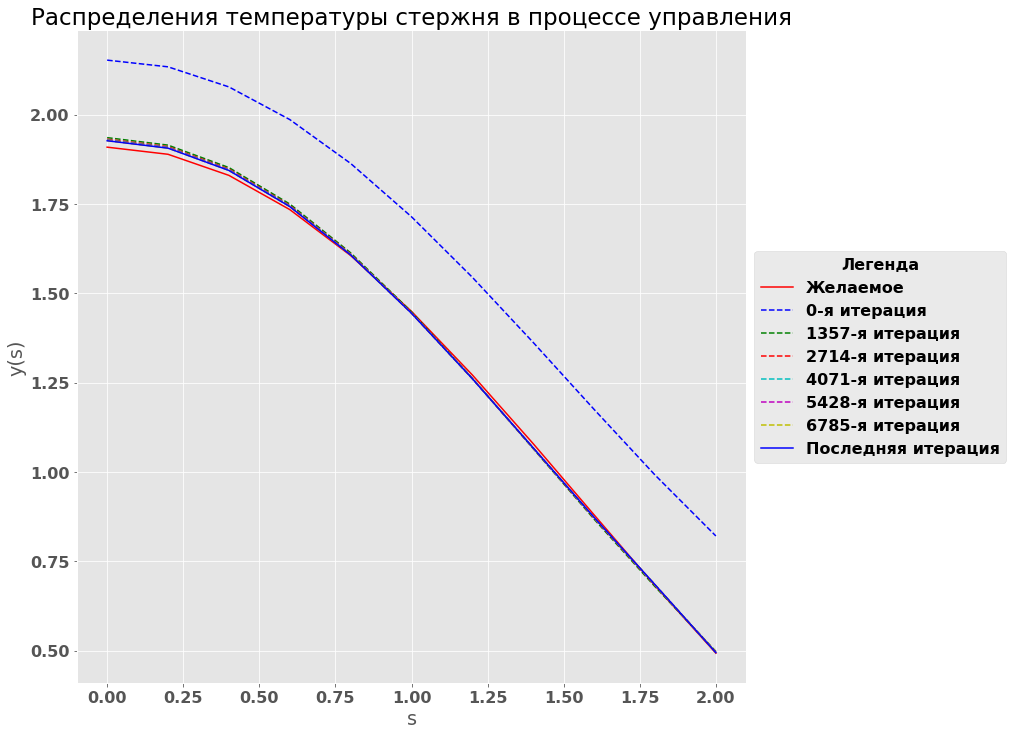

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
part = 1
count = 5
step = int(model.final_step / count / part)
for i in range(0, int(model.final_step / part), step):
    ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
#ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Распределения температуры стержня в процессе управления')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное распределение температур

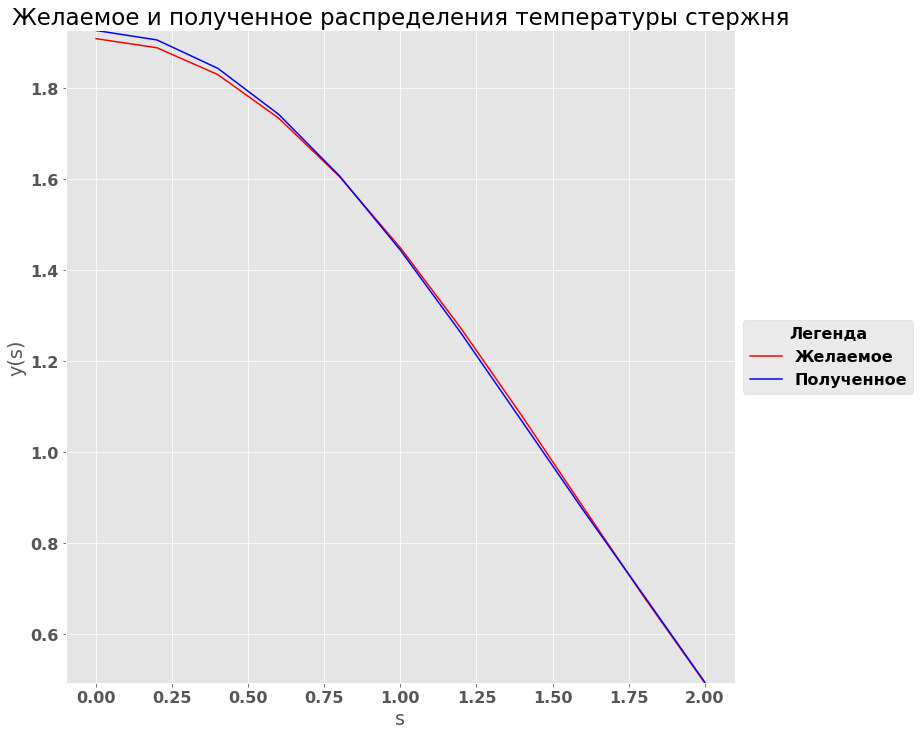

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения температуры стержня')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Управление

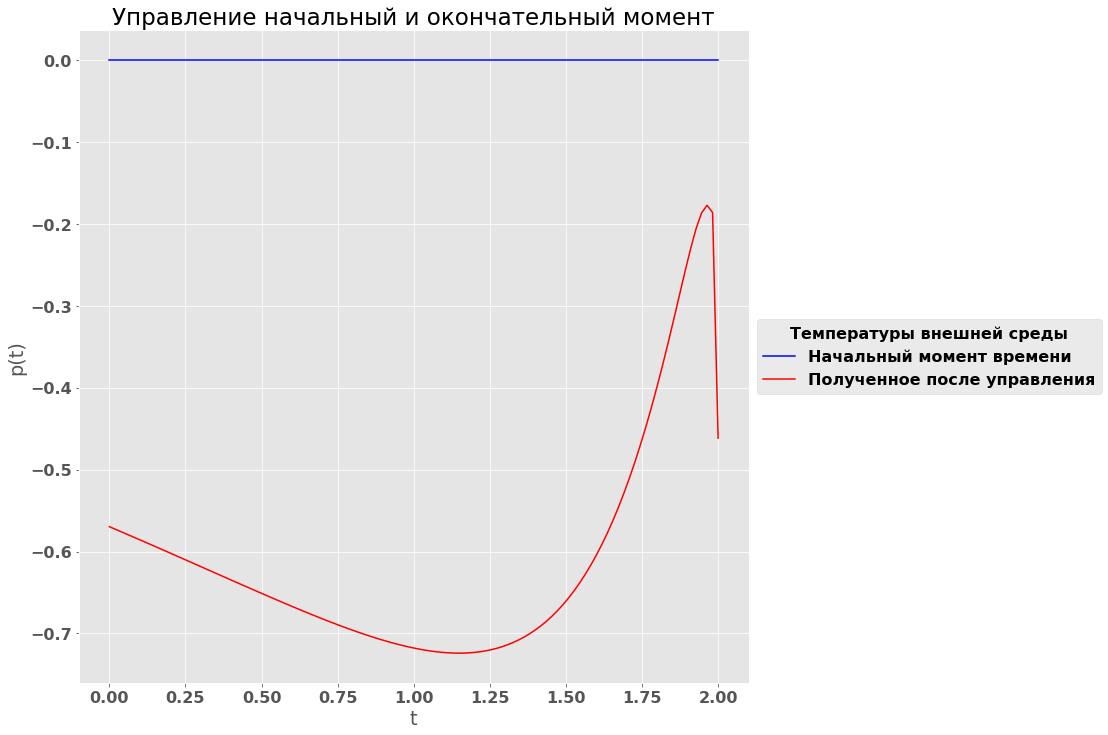

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_, model.p_arr[0], color='b', label='Начальный момент времени')
ax.plot(Y_, model.p_arr[-1], color='r', label='Полученное после управления')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Управление начальный и окончательный момент')
plt.legend(title='Температуры внешней среды', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.9993275506272045e-06, 0.10000999932755063)

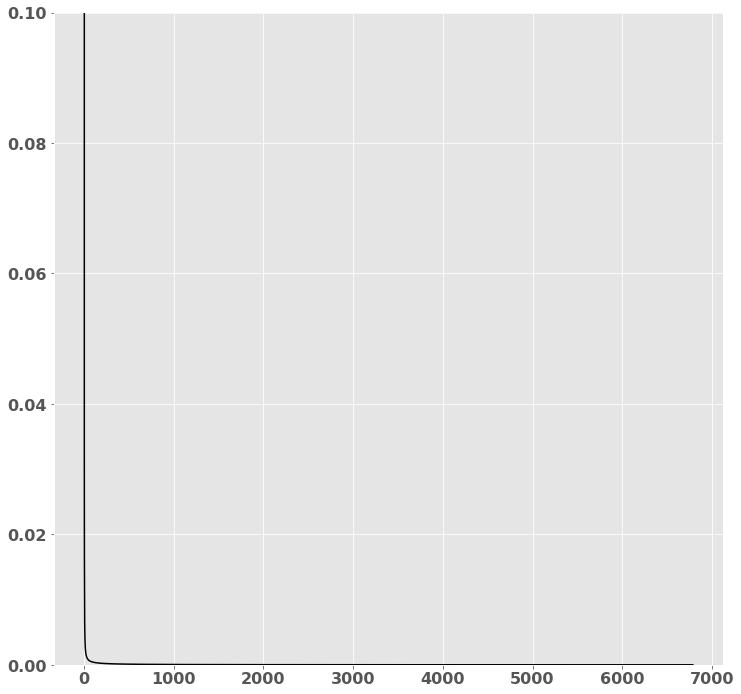

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])